In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt# Q1. Output variable -> y
y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")


In [2]:
df=pd.read_csv('bank-full.csv')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 17)

In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Datatype Coversions

In [7]:
df['job']=df['job'].astype('category')
df['marital']=df['marital'].astype('category')
df['education']=df['education'].astype('category')
df['default']=df['default'].astype('category')
df['housing']=df['housing'].astype('category')
df['y']=df['y'].astype('category')
df['month']=df['month'].astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  object  
 8   contact    45211 non-null  object  
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  object  
 16  y          45211 non-null  category
dtypes: category(7), int64(7), object(3)
memory usage: 3.8+ MB


# Check for Duplicates

In [9]:
df[df.duplicated()].shape

(0, 17)

In [10]:
df[df.duplicated()] # No Duplicate values found

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


# Outlier Detection and Cleaning

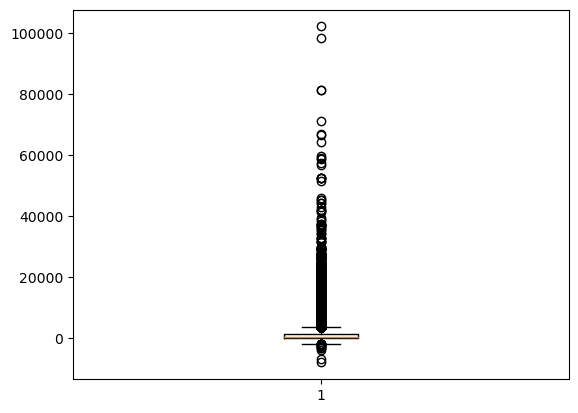

In [11]:
data_box=df.dropna()
data_box1=data_box.balance
plt.boxplot(data_box1)
plt.show()

In [12]:
df.balance.describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [13]:
# Calculate IQR
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1

In [14]:
# Remove data points outside IQR range
df = df[~((df['balance'] < (Q1 - 1.5 * IQR)) |(df['balance'] > (Q3 + 1.5 * IQR)))]

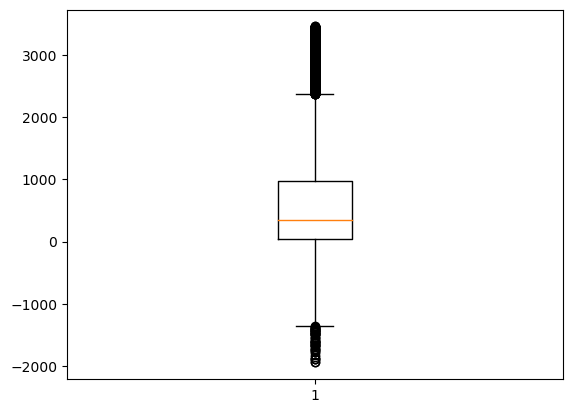

In [15]:
data_box=df.dropna()
data_box1=data_box.balance
plt.boxplot(data_box1)
plt.show()

In [16]:
df.balance.describe()

count    40482.000000
mean       640.636233
std        844.435442
min      -1944.000000
25%         46.000000
50%        349.000000
75%        980.750000
max       3462.000000
Name: balance, dtype: float64

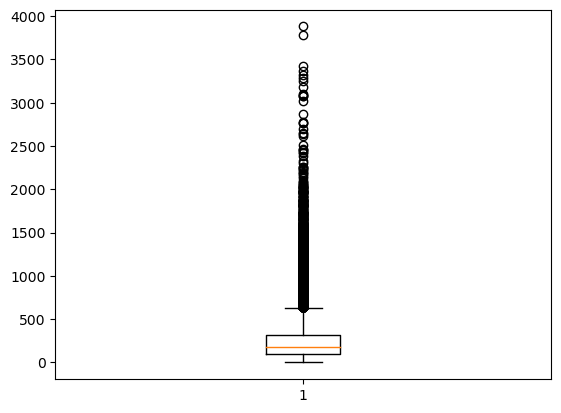

In [17]:
data_box=df.dropna()
data_box1=data_box.duration
plt.boxplot(data_box1)
plt.show()

In [18]:
df.duration.describe()

count    40482.000000
mean       256.156835
std        255.504239
min          0.000000
25%        103.000000
50%        179.000000
75%        316.000000
max       3881.000000
Name: duration, dtype: float64

In [19]:
# Calculate IQR
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1

In [20]:
# Remove data points outside IQR range
df = df[~((df['duration'] < (Q1 - 1.5 * IQR)) |(df['duration'] > (Q3 + 1.5 * IQR)))]

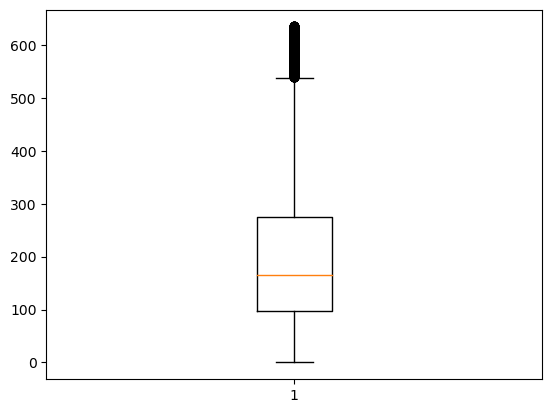

In [21]:
data_box=df.dropna()
data_box1=data_box.duration
plt.boxplot(data_box1)
plt.show()

In [22]:
df.duration.describe()

count    37572.000000
mean       201.743053
std        138.937303
min          0.000000
25%         98.000000
50%        166.000000
75%        274.250000
max        635.000000
Name: duration, dtype: float64

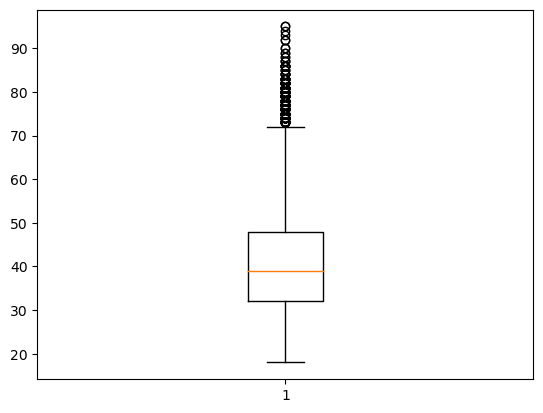

In [23]:
data_box=df.dropna()
data_box1=data_box.age
plt.boxplot(data_box1)
plt.show()

In [24]:
df.age.describe()

count    37572.000000
mean        40.634728
std         10.442249
min         18.000000
25%         32.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

<AxesSubplot:>

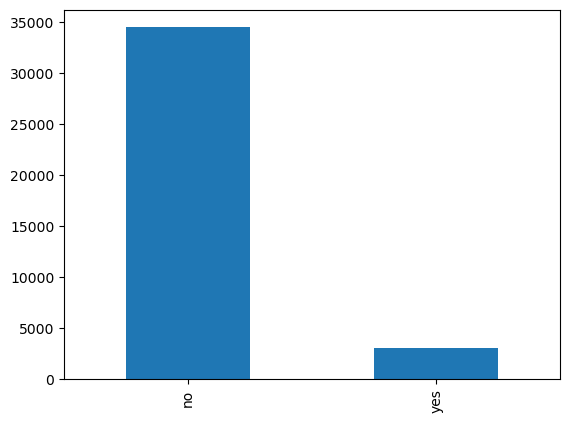

In [25]:
val_counts=df['y'].value_counts()
val_counts.plot.bar()

<AxesSubplot:>

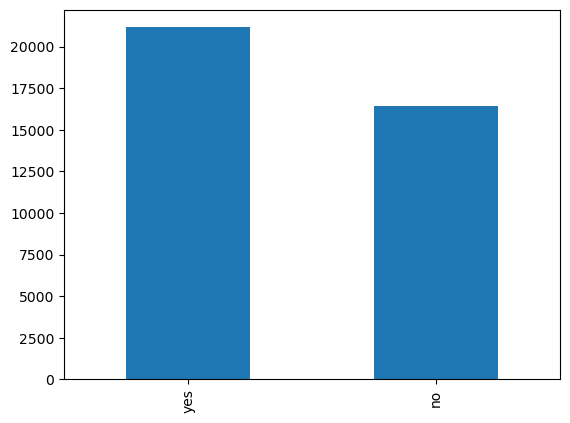

In [26]:
val_counts=df['housing'].value_counts()
val_counts.plot.bar()

<AxesSubplot:>

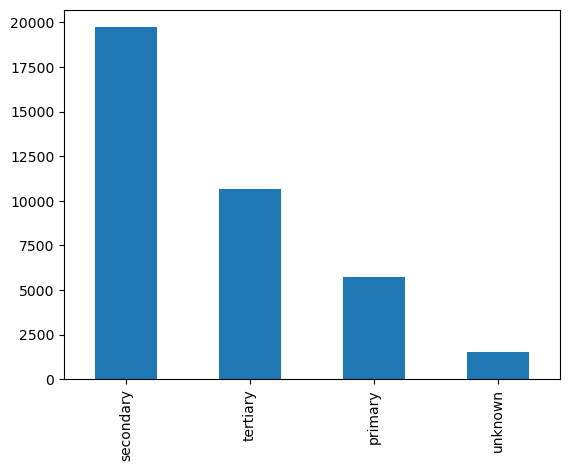

In [27]:
val_counts=df['education'].value_counts()
val_counts.plot.bar()

<AxesSubplot:>

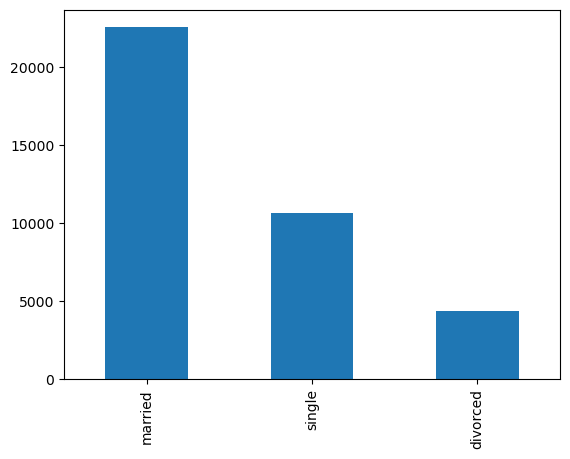

In [28]:
val_counts=df['marital'].value_counts()
val_counts.plot.bar()

<AxesSubplot:>

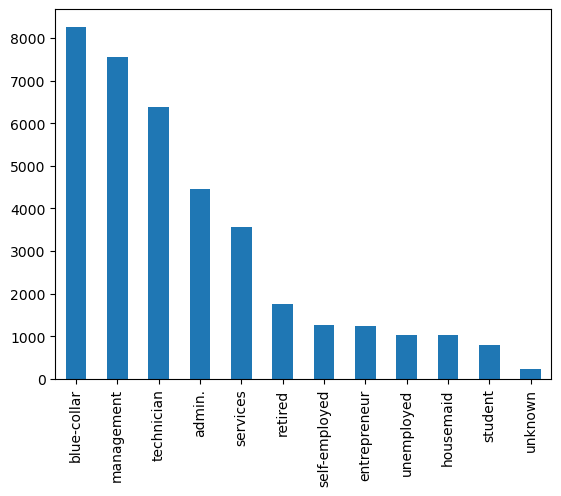

In [29]:
val_counts=df['job'].value_counts()
val_counts.plot.bar()

In [35]:
X=df[["age","balance","day","duration","campaign","pdays","previous"]]
y=df[["y"]]

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [37]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\thila\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thila\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
y_pred=model.predict(X_test)

In [39]:
y_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [40]:
y_test

,y
959,no
35050,no
13591,no
25403,no
23943,no
...,...
35883,no
10514,no
28752,no
39882,no


In [41]:
df=pd.DataFrame()
df["Actual"]=y_test
df["Prediction"]=y_pred
df.reset_index(inplace=True,drop=True)

In [42]:
df

,Actual,Prediction
0,no,no
1,no,no
2,no,no
3,no,no
4,no,no
...,...,...
7510,no,no
7511,no,no
7512,no,no
7513,no,no


In [43]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_pred,y_test)
print(confusion_matrix)

[[6855  600]
 [  45   15]]


In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

          no       0.99      0.92      0.96      7455
         yes       0.02      0.25      0.04        60

    accuracy                           0.91      7515
   macro avg       0.51      0.58      0.50      7515
weighted avg       0.99      0.91      0.95      7515



<AxesSubplot:>

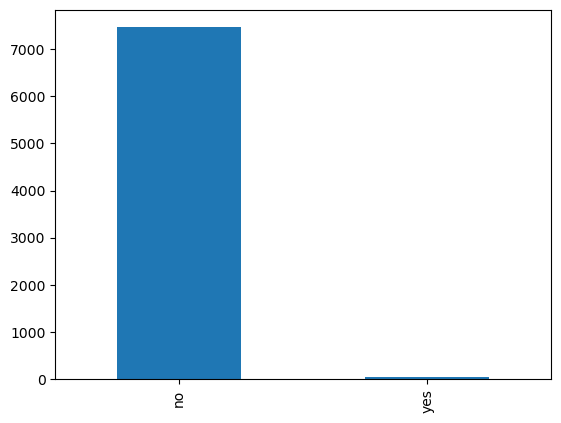

In [45]:
val_counts=df['Actual'].value_counts()
val_counts=df['Prediction'].value_counts()
val_counts.plot.bar()

In [57]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y,y_pred, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


TypeError: unsupported operand type(s) for -: 'str' and 'str'